# Computer Infrastructure Assignment 2025 

### Submission by Faolán H
-----

## Modules used throughout the assignment 

Standard python modules are imported first as per good practise guidelines

### Source documentation for the modules:
- datetime (https://docs.python.org/3/library/datetime.html)
- Pandas (https://pandas.pydata.org/docs/)
- Matplotlib (https://matplotlib.org/stable/api/pyplot_summary.html)
- yfinance (https://github.com/ranaroussi/yfinance)


In [1]:
# datetime
import datetime as dt

# pandas
import pandas as pd

# matplotlib.pyplot
import matplotlib.pyplot as plt

# Yahoo Finance API data
import yfinance as yf

-----

## There are four problems in this assignment structured throughout this Jupyter Notebook as follows:
### - Name the Problem
### - Describe the Problem
### - Solve the Problem
----------

## Problem 1: Data from yfinance

### Name the Problem
##### Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

- Facebook (META)
- Apple (AAPL)
- Amazon (AMZN)
- Netflix (NFLX)
- Google (GOOG)
##### The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.

### Describe the Problem
##### There are several steps that need to be taken to solve the problem:
- Bring in the data
- Format it in the correct way
- Create a csv of the data, which is to be placed in a data folder

# yfinance download documentation
https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html

##### The abbreviated name of the relevant stock names has been provided. To find these abbreviated names, you can search on the official yahoo finance website (https://finance.yahoo.com/)

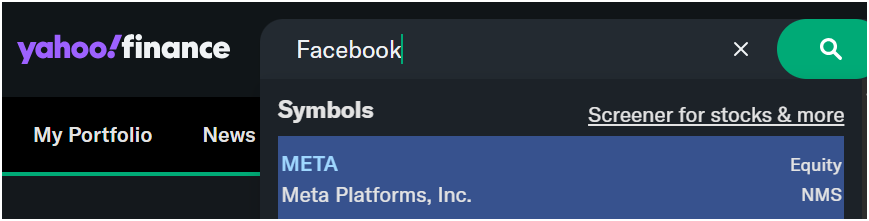

In [2]:
#Setting the dataframe. This includes the data for the FAANG companies at a period of 5 days and 60 minute intervals
df = yf.download ('META AAPL AMZN NFLX GOOG', period = '5d', interval = '60m')

/tmp/ipykernel_30299/2860173891.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download ('META AAPL AMZN NFLX GOOG', period = '5d', interval = '60m')
[*********************100%***********************]  5 of 5 completed


In [3]:
# Looking at the dataframe index to ensure there are 60m intervals
df.index

DatetimeIndex(['2025-11-03 14:30:00+00:00', '2025-11-03 15:30:00+00:00',
               '2025-11-03 16:30:00+00:00', '2025-11-03 17:30:00+00:00',
               '2025-11-03 18:30:00+00:00', '2025-11-03 19:30:00+00:00',
               '2025-11-03 20:30:00+00:00', '2025-11-04 14:30:00+00:00',
               '2025-11-04 15:30:00+00:00', '2025-11-04 16:30:00+00:00',
               '2025-11-04 17:30:00+00:00', '2025-11-04 18:30:00+00:00',
               '2025-11-04 19:30:00+00:00', '2025-11-04 20:30:00+00:00',
               '2025-11-05 14:30:00+00:00', '2025-11-05 15:30:00+00:00',
               '2025-11-05 16:30:00+00:00', '2025-11-05 17:30:00+00:00',
               '2025-11-05 18:30:00+00:00', '2025-11-05 19:30:00+00:00',
               '2025-11-05 20:30:00+00:00', '2025-11-06 14:30:00+00:00',
               '2025-11-06 15:30:00+00:00', '2025-11-06 16:30:00+00:00',
               '2025-11-06 17:30:00+00:00', '2025-11-06 18:30:00+00:00',
               '2025-11-06 19:30:00+00:00', '2025-1

#### This outputs the results as defined in the dataframe into comma separated values using datetime
#### Source datetime.today(): https://docs.python.org/3/library/datetime.html#datetime.datetime.today

In [18]:
#The dataframe is created from data from the past five working days, and so today's date is being used
today = dt.datetime.today()

#### Source strftime: https://docs.python.org/3/library/datetime.html#datetime.datetime.today

In [19]:
#This formats today into an order that suits the file output name
today_format = today.strftime("%Y.%m.%d_%H.%M.%S")

#### Source Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

In [ ]:
# This brings together the data and format name into a folder specifically created for the outputs
df.to_csv("data/" + "faangdata_" + today_format + ".csv")

-----
## Problem 2: Plotting the data

##### Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.

In [7]:
#date.max 
#https://docs.python.org/3/library/datetime.html
data = open('data/faangdata_2025.11.02_17.06.55.csv')
data

<_io.TextIOWrapper name='data/faangdata_2025.11.02_17.06.55.csv' mode='r' encoding='UTF-8'>

In [8]:
#https://stackoverflow.com/questions/75539438/get-a-dataframe-from-a-python-notebook-ipynb-to-another
plotdata = pd.read_csv('data/faangdata_2025.11.02_17.06.55.csv')

In [9]:
date = plotdata.iloc[2:,0]

In [10]:
applclose = plotdata.iloc[2:,1]

In [11]:
amznclose = plotdata.iloc[2:,2]

In [12]:
googclose = plotdata.iloc[2:,3]

In [13]:
metaclose = plotdata.iloc[2:,4]

In [14]:
nflxclose = plotdata.iloc[2:,5]

<BarContainer object of 35 artists>

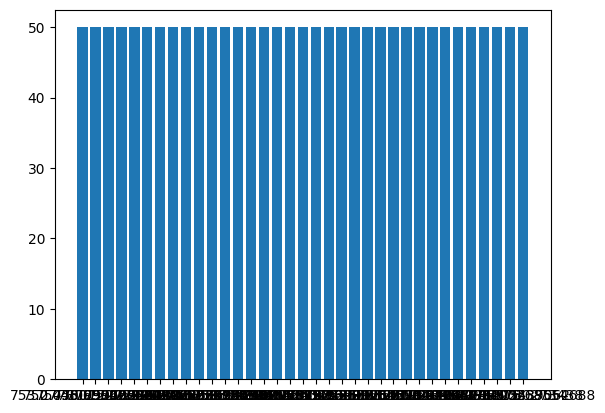

In [15]:
#plt.title ("Closing prices of the FAANG Stocks")
plt.bar (metaclose, height =50)

-----
## Problem 3: Script
##### Create a Python script called faang.py in the root of your repository. Copy the above functions into it and it so that whenever someone at the terminal types ./faang.py, the script runs, downloading the data and creating the plot. Note that this will require a shebang line and the script to be marked executable. Explain the steps you took in your notebook.

-----
## Problem 4: Automation
##### Create a GitHub Actions workflow to run your script every Saturday morning. The script should be called faang.yml in a .github/workflows/ folder in the root of your repository. In your notebook, explain each of the individual lines in your workflow.

-----
# END
-----